<a href="https://colab.research.google.com/github/udayLab/PAMI/blob/main/notebooks/fuzzyFrequentPattern/basic/FFIMiner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finding Frequent patterns in Fuzzy Databases using FFIMiner

This tutorial has two parts. In the first part, we describe the basic approach to find Frequent patterns in a fuzzy database using the FFIMiner algorithm. In the final part, we describe an advanced approach, where we evaluate the FFIMiner algorithm on a dataset at different minimum support threshold values.
***

# Prerequisites:

1.   Installing the PAMI library

In [8]:
!pip install -U pami #install the pami repository

2.   Downloading a sample dataset

In [9]:
!wget -nc https://u-aizu.ac.jp/~udayrage/datasets/fuzzyDatabases/Fuzzy_T10I4D100K.csv #download a sample fuzzy database

File ‘Fuzzy_T10I4D100K.csv’ already there; not retrieving.



3.   Printing few lines of a dataset to know its format.

In [10]:
!head -2 Fuzzy_T10I4D100K.csv

25.L	25.M	52.H	164.H	240.H	274.H	328.L	368.H	448.H	538.H	561.H	630.H	687.H	730.H	775.H	825.H	834.H:0.4	0.6	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	 
39.H	120.H	124.H	205.H	401.H	581.H	704.H	814.H	825.H	834.H:1	1	1	1	1	1	1	1	1	1	 


format: every row contains items seperated by a seperator.

Example:

item1 item2 item3 item4

item1 item4 item6
***

## Part 1: Finding Frequent patterns using FFIMiner

### Step 1: Import the FFIMiner algorithm

In [14]:
from PAMI.fuzzyFrequentPattern.basic import FFIMiner  as alg #import the algorithm

### Step 2: Specify the input parameters

In [17]:
inputFile = 'Fuzzy_T10I4D100K.csv'
minimumSupportCount = 1000  #minSup is specified in count. However, the users can also specify minSup between 0 and 1.

### Step 3: Execute the FFIMiner algorithm

In [18]:
obj = alg.FFIMiner(iFile=inputFile, minSup=minimumSupportCount, sep='\t') #initialize
obj.mine()            #start the mining process

### Step 4: Storing the generated patterns

#### Step 4.1: Storing the generated patterns in a file

In [19]:
obj.save('frequentPatternsAtMinSupCount1000.txt')

#### Step 4.2. Storing the generated patterns in a data frame

In [20]:
frequentPatternsDF= obj.getPatternsAsDataFrame()

### Step 5: Getting the statistics

#### Step 5.1: Total number of discovered patterns

In [21]:
print('Total No of patterns: ' + str(len(frequentPatternsDF)))

Total No of patterns: 359


#### Step 5.2: Runtime consumed by the mining algorithm

In [22]:
print('Runtime: ' + str(obj.getRuntime()))

Runtime: 284.6766936779022


#### Step 5.3: Total Memory consumed by the mining algorithm

In [23]:
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))

Memory (RSS): 443850752
Memory (USS): 397139968


## Part 2: Evaluating the FFIMiner algorithm on a dataset at different minSup values

### Step 1: Import the libraries and specify the input parameters

In [24]:
#Import the libraries
from PAMI.fuzzyFrequentPattern.basic import FFIMiner  as alg #import the algorithm
import pandas as pd

#Specify the input parameters
inputFile = 'Fuzzy_T10I4D100K.csv'
seperator='\t'
minimumSupportCountList = [1000, 1500, 2000, 2500, 3000]
#minimumSupport can also specified between 0 to 1. E.g., minSupList = [0.005, 0.006, 0.007, 0.008, 0.009]

### Step 2: Create a data frame to store the results of FFIMiner

In [25]:
result = pd.DataFrame(columns=['algorithm', 'minSup', 'patterns', 'runtime', 'memory'])
#initialize a data frame to store the results of FFIMiner algorithm

### Step 3: Execute the algorithm at different minSup values

In [26]:
for minSupCount in minimumSupportCountList:
    obj = alg.FFIMiner(inputFile, minSup=minSupCount, sep=seperator)
    obj.mine()
    #store the results in the data frame
    result.loc[result.shape[0]] = ['FFIMiner', minSupCount, len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]

### Step 4: Print the Result

In [27]:
print(result)

  algorithm  minSup  patterns     runtime     memory
0  FFIMiner    1000       359  283.778925  446255104
1  FFIMiner    1500       208  126.854201  407474176
2  FFIMiner    2000       130   61.927413  380592128
3  FFIMiner    2500        86   31.117553  360353792
4  FFIMiner    3000        46   11.347489  338923520


### Step 5: Visualizing the results

<Axes: xlabel='minSup'>

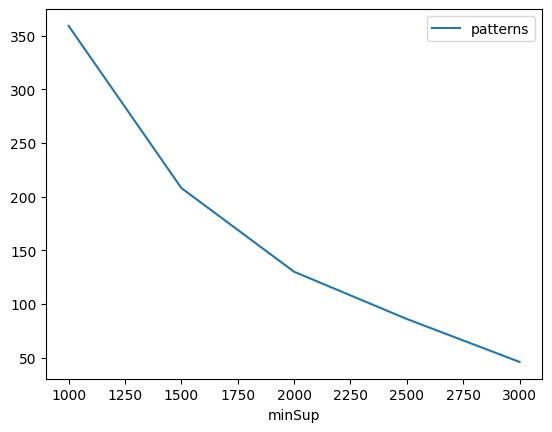

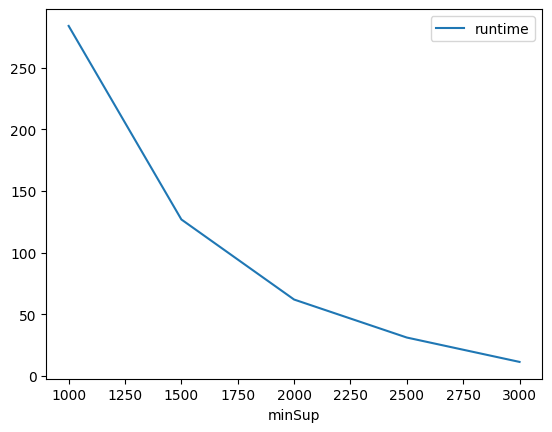

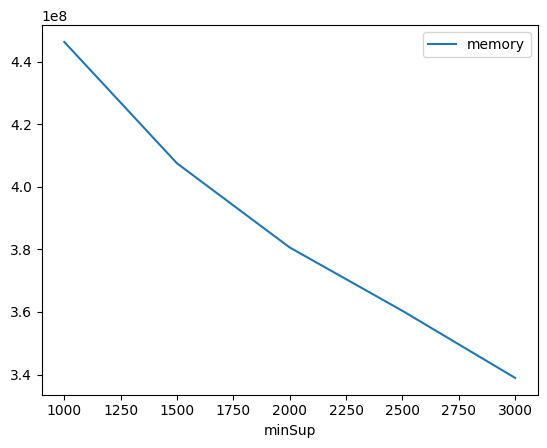

In [28]:
result.plot(x='minSup', y='patterns', kind='line')
result.plot(x='minSup', y='runtime', kind='line')
result.plot(x='minSup', y='memory', kind='line')

#Graphs can be improved further by using additional packages, such as plotly and matplotlib